# PUBG Death Data
***

**Name**: Jacob Tran, Neil Nguyen, Phi Trang

***

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import math
from scipy import stats
from scipy.stats import norm
%matplotlib inline

### Import Data
***

In [2]:
local_path = 'pubg_death_1million.csv'
pubg_death = pd.read_csv(local_path)


In [3]:
erangel_map = pubg_death.loc[(pubg_death["map"]=="ERANGEL")]
miramar_map = pubg_death.loc[(pubg_death["map"]=="MIRAMAR")]

In [4]:
bad_erangel_match_id = list(erangel_map.loc[erangel_map["killed_by"]=="Down and Out", "match_id"].drop_duplicates())
solo_erangel = erangel_map.loc[~erangel_map["match_id"].isin(bad_erangel_match_id)]

bad_miramar_match_id = list(miramar_map.loc[miramar_map["killed_by"]=="Down and Out", "match_id"].drop_duplicates())
solo_miramar = miramar_map.loc[~miramar_map["match_id"].isin(bad_miramar_match_id)]


In [5]:
solo_erangel.head() # 190,000 entries

killed_by killer_name  killer_placement  killer_position_x  \
256    Kar98k      Chewwe              35.0           375243.2   
257       AKM  jiuxijiuxi              56.0           627858.1   
258      M416   RealSushi              27.0           710350.6   
259    Vector   RealSushi              27.0           700144.3   
260   Mini 14       XiZiE              14.0           511061.8   

     killer_position_y      map  \
256           422101.2  ERANGEL   
257           379821.1  ERANGEL   
258           357266.2  ERANGEL   
259           342623.9  ERANGEL   
260           467855.6  ERANGEL   

                                              match_id  time  \
256  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...   638   
257  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...   207   
258  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...   390   
259  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...    84   
260  2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...  1142   

          victim_name  victim_placement  victim_position_x  victim_position_y  
256      KingCobraGut              52.0           381097.3           448397.5  
257  Thecrossbowstore              72.0           628253.9           378554.9  
258         whiteodie              61.0           707263.8           357796.7  
259        UpInTheMix              95.0           700660.9           344219.4  
260           KinRing              28.0           506420.9           472782.0

### Plot Data Looking for Insight
***

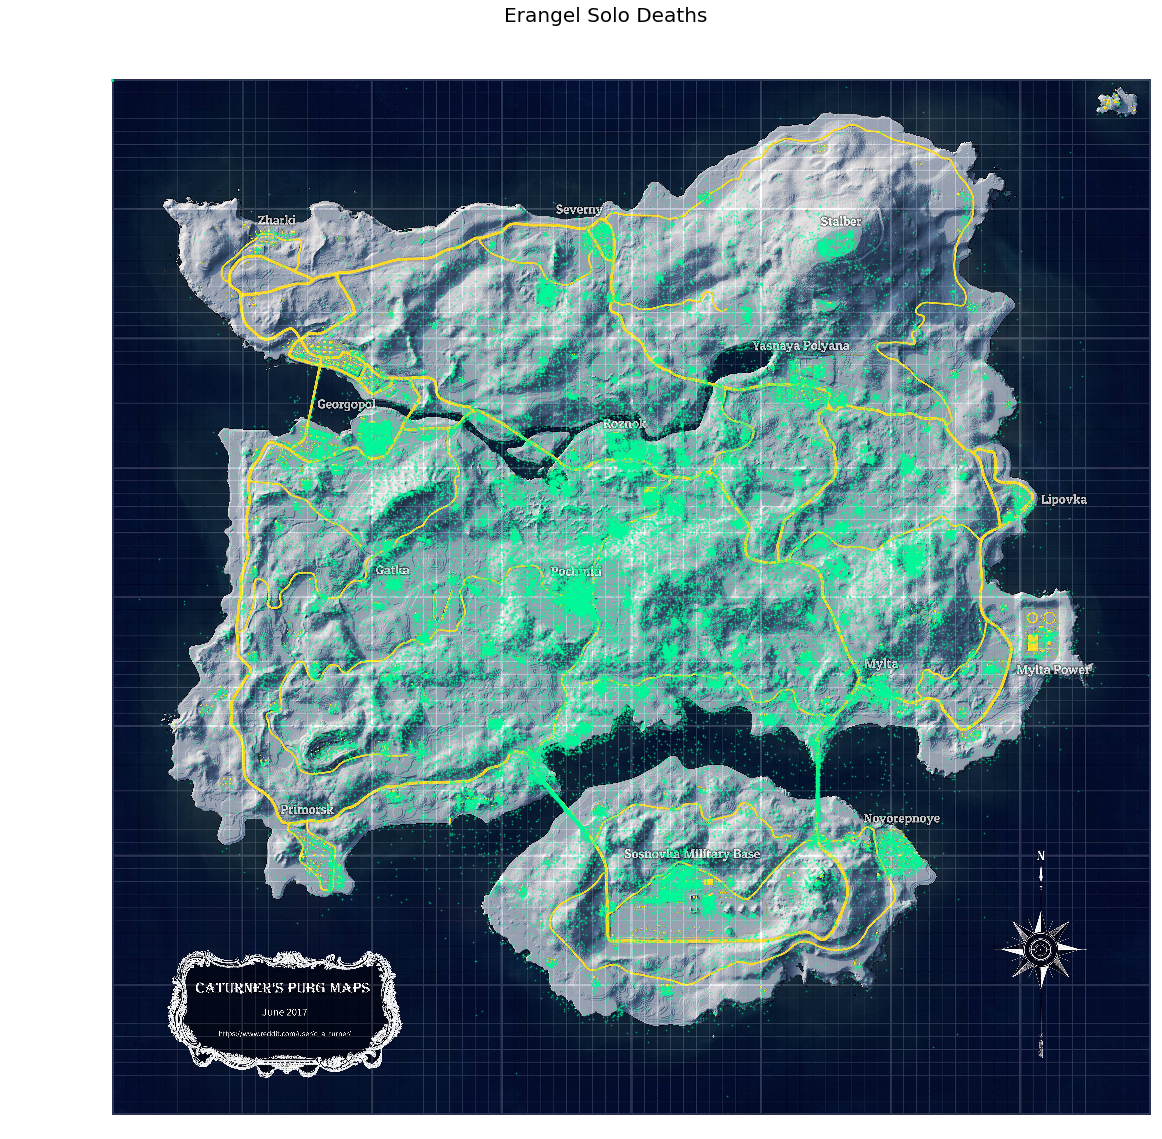

In [6]:
fig, ax = plt.subplots(figsize = (20,20))
im = plt.imread('img/erangelMap.jpg')
ax.imshow(im, extent=[0, 813000, -810000, 0], zorder=1)
ax.set_title("Erangel Solo Deaths", fontsize=20)
ax.set_axis_off()

ax.scatter(x=list(solo_erangel['victim_position_x']), y=list(-1*solo_erangel['victim_position_y']), s=0.5, color="mediumspringgreen", alpha=0.5, zorder=2)

plt.show()

### Weapons Data
***

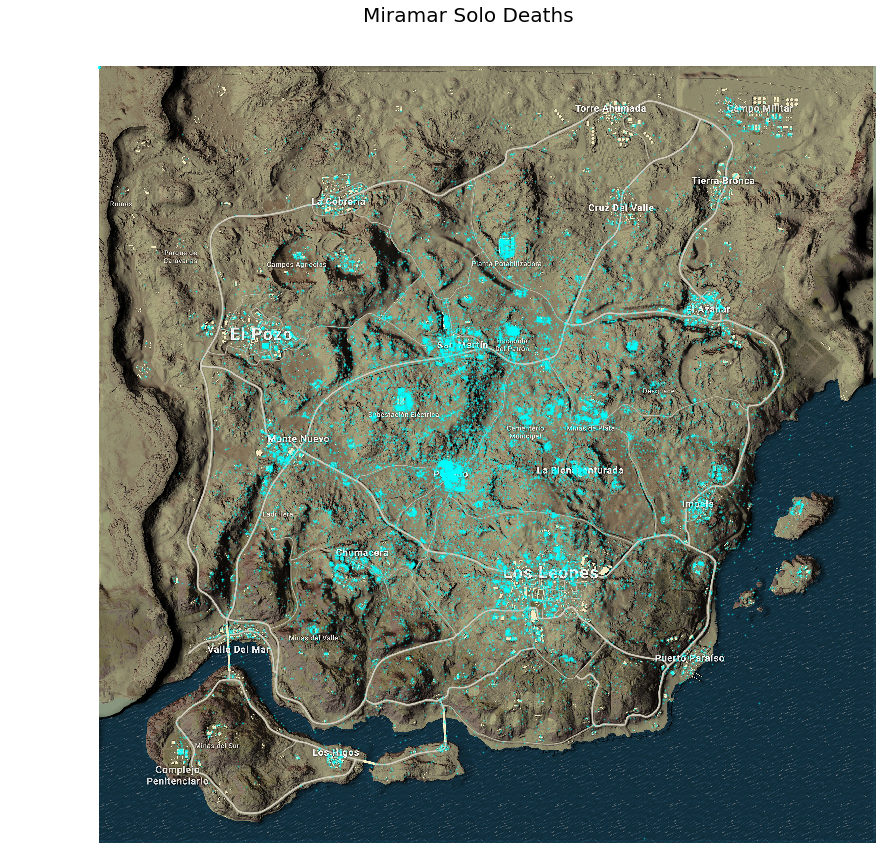

In [13]:
fig, ax = plt.subplots(figsize = (15,15))

im = plt.imread('img/miramarMap.png')
ax.imshow(im, extent=[0, 820000, -820000, 0], zorder=1)
ax.scatter(x=list(solo_miramar['victim_position_x']), y=list(-1*solo_miramar['victim_position_y']), s=0.5, color="cyan", alpha=0.5, zorder=2)
ax.set_title("Miramar Solo Deaths", fontsize=20)
# ax.set_xlabel("x coordinate", fontsize=15)
# ax.set_ylabel("y coordinate", fontsize=15)
ax.set_axis_off()

plt.show()

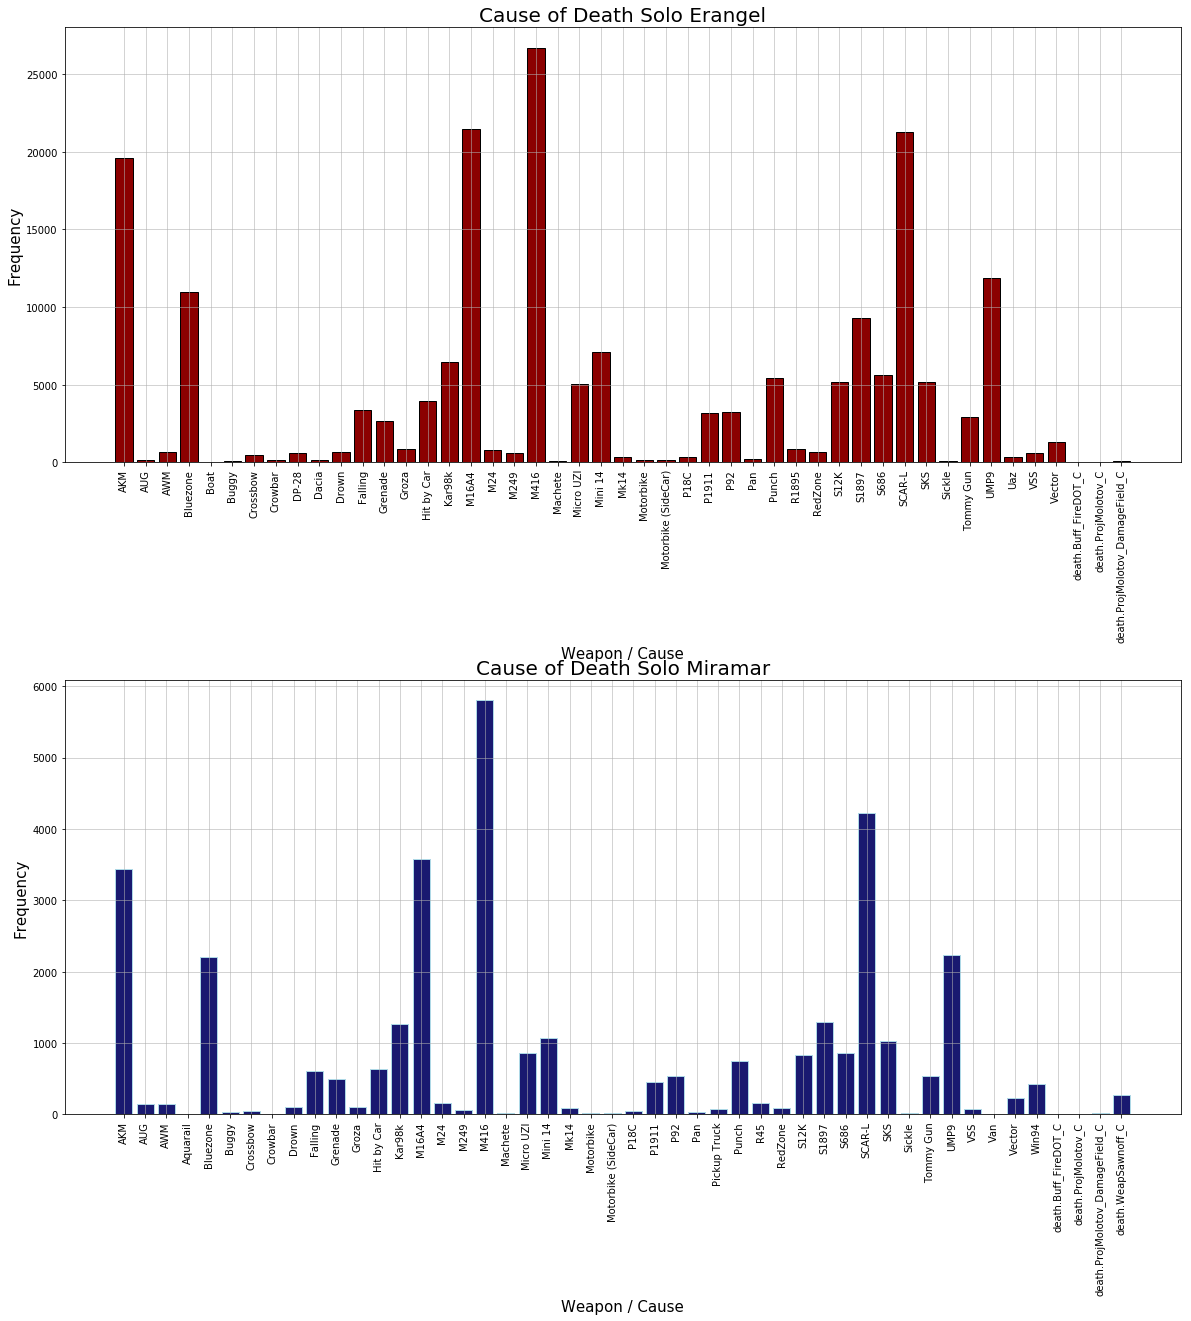

In [8]:
erangelWeapon = list(solo_erangel['killed_by'])
erangelUniqueWeapon = list(set(erangelWeapon))
erangelWeaponCount = []
for i in erangelUniqueWeapon:
    erangelWeaponCount.append(erangelWeapon.count(i))
    
miramarWeapon = list(solo_miramar['killed_by'])
miramarUniqueWeapon = list(set(miramarWeapon))
miramarWeaponCount = []
for i in miramarUniqueWeapon:
    miramarWeaponCount.append(miramarWeapon.count(i))    
    
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
fig.subplots_adjust(hspace=0.5)

ax[0].set_title("Cause of Death Solo Erangel", fontsize=20)
ax[0].set_xlabel("Weapon / Cause", fontsize=15)
ax[0].set_ylabel("Frequency", fontsize=15)
ax[0].grid(True, alpha=0.69)
ax[0].bar(erangelUniqueWeapon, erangelWeaponCount, facecolor="darkred", edgecolor="black")
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
    
ax[1].set_title("Cause of Death Solo Miramar", fontsize=20)
ax[1].set_xlabel("Weapon / Cause", fontsize=15)
ax[1].set_ylabel("Frequency", fontsize=15)
ax[1].grid(True, alpha=0.69)
ax[1].bar(miramarUniqueWeapon, miramarWeaponCount, facecolor="midnightblue", edgecolor="lightblue")
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
plt.show()

### Mean Distance Between Killer and Victim
***

In [9]:
# # https://stackoverflow.com/questions/5407969/distance-formula-between-two-points-in-a-list?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# def distance(p0, p1):
#     return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

# killer_x = solo_erangel['killer_position_x'].tolist()
# killer_y = solo_erangel['killer_position_y'].tolist()
# victim_x = solo_erangel['victim_position_x'].tolist()
# victim_y = solo_erangel['victim_position_y'].tolist()

# distances_erengel = []
# for i in range(len(killer_x)):
#     if math.isnan(killer_x[i]) or math.isnan(killer_y[i]):
#         pass
#     else:
#         killer_xy = (killer_x[i], killer_y[i])
#         victim_xy = (victim_x[i], victim_y[i])
#         distances_erengel.append(distance(victim_xy, killer_xy))
# print("Mean distance between killer and victim for Erangel", np.mean(distances_erengel))

# killer_x = solo_miramar['killer_position_x'].tolist()
# killer_y = solo_miramar['killer_position_y'].tolist()
# victim_x = solo_miramar['victim_position_x'].tolist()
# victim_y = solo_miramar['victim_position_y'].tolist()

# distances_miramar = []
# for i in range(len(killer_x)):
#     if math.isnan(killer_x[i]) or math.isnan(killer_y[i]):
#         pass
#     else:
#         killer_xy = (killer_x[i], killer_y[i])
#         victim_xy = (victim_x[i], victim_y[i])
#         distances_miramar.append(distance(victim_xy, killer_xy))
# print("Mean distance between killer and victim for Miramar", np.mean(distances_miramar))

### Mean Distance Between Killer and Victim Based on Weapon
***

In [10]:
weapon_erangel = solo_erangel[['killed_by', 'killer_position_x', 'killer_position_y', 'victim_position_x', 'victim_position_y']]
weapon_erangel = weapon_erangel.dropna()
weapon_erangel = weapon_erangel[~weapon_erangel['victim_position_x'].isin([0.0]) & ~weapon_erangel['killer_position_x'].isin([0.0])]

weapon_miramar = solo_miramar[['killed_by', 'killer_position_x', 'killer_position_y', 'victim_position_x', 'victim_position_y']]
weapon_miramar = weapon_miramar.dropna()
weapon_miramar = weapon_miramar[~weapon_miramar['victim_position_x'].isin([0.0]) & ~weapon_miramar['killer_position_x'].isin([0.0])]

In [11]:
def distance(p0, p1):
     return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

# ERANGEL
erangel_weapons_dict = {}
for index, row in weapon_erangel.iterrows():
    killer_xy = (row[1], row[2])
    victim_xy = (row[3], row[4])
    dist = distance(killer_xy, victim_xy)
    key = str(row[0])
    if key not in erangel_weapons_dict:
        erangel_weapons_dict[key] = [dist]
    else:
        erangel_weapons_dict[key].append(dist)
        
erangel_weapons = []
for key, value in erangel_weapons_dict.items():
    erangel_weapons.append(key)
    
mean_erangel_weapons_dist = []
for i in erangel_weapons:
    mean_erangel_weapons_dist.append(np.mean(erangel_weapons_dict[i]))

# MIRAMAR
miramar_weapons_dict = {}
for index, row in weapon_miramar.iterrows():
    killer_xy = (row[1], row[2])
    victim_xy = (row[3], row[4])
    dist = distance(killer_xy, victim_xy)
    key = str(row[0])
    if key not in miramar_weapons_dict:
        miramar_weapons_dict[key] = [dist]
    else:
        miramar_weapons_dict[key].append(dist)
        
miramar_weapons = []
for key, value in miramar_weapons_dict.items():
    miramar_weapons.append(key)
    
mean_miramar_weapons_dist = []
for i in miramar_weapons:
    mean_miramar_weapons_dist.append(np.mean(miramar_weapons_dict[i]))


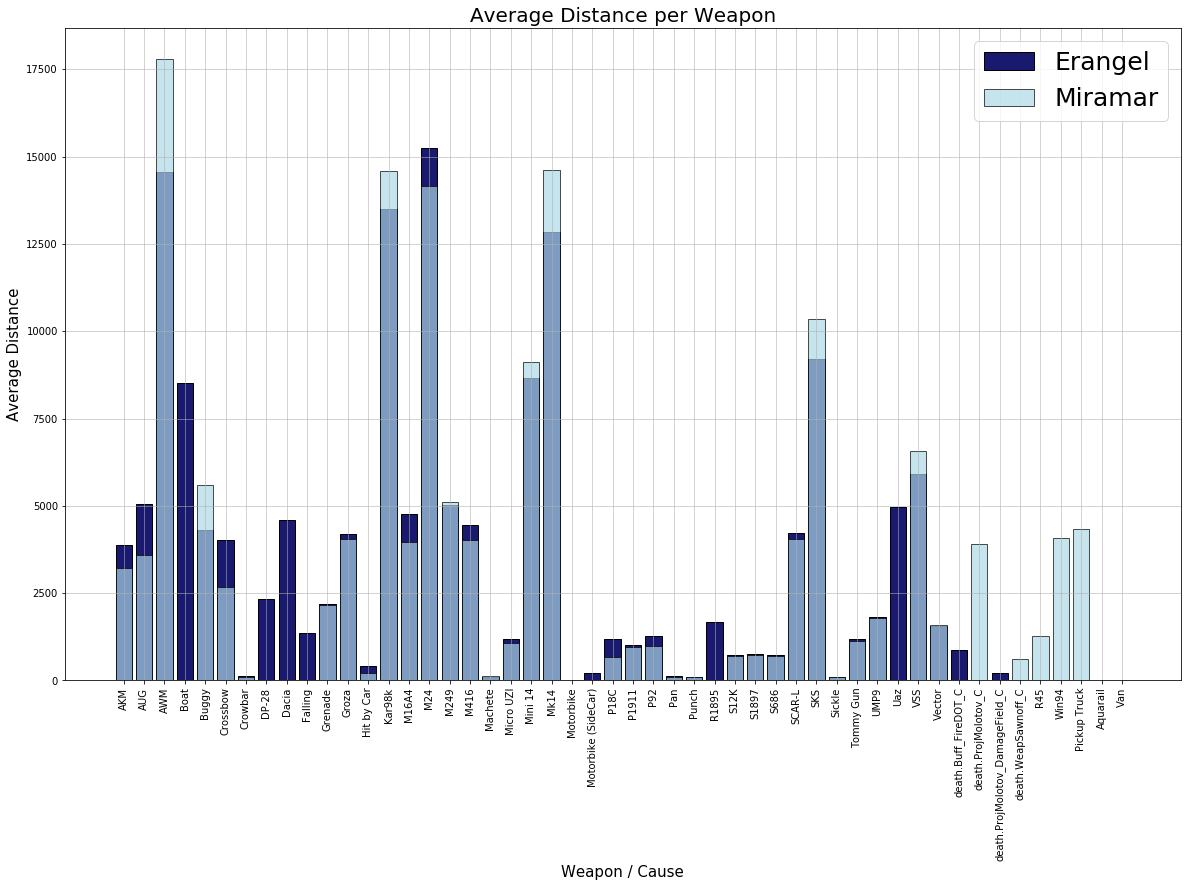

In [12]:
# PLOT
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,12))
fig.subplots_adjust(hspace=0.5)
ax.set_title("Average Distance per Weapon", fontsize=20)
ax.set_xlabel("Weapon / Cause", fontsize=15)
ax.set_ylabel("Average Distance", fontsize=15)
ax.grid(True, alpha=0.69)
ax.bar(erangel_weapons, mean_erangel_weapons_dist, facecolor="midnightblue", edgecolor="black", label="Erangel")
ax.bar(miramar_weapons, mean_miramar_weapons_dist, facecolor="lightblue", edgecolor="black", label="Miramar", alpha=0.69)
plt.legend(loc=1, prop={'size': 25})
for tick in ax.get_xticklabels():
    tick.set_rotation(90)